# Линейная регрессия
__Суммарное количество баллов: 10__


In [133]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
from numpy.linalg import inv
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
def read_data(path='boston.csv'):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [125]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [44]:
class NormalLR:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X_1 = np.insert(X, 0, 1, axis=1)
        X_1_T = X_1.T
        inv_matrix = inv(np.dot(X_1_T, X_1))
        self.w = np.dot(np.dot(inv_matrix, X_1_T), y)
    
    def predict(self, X):
        X_1 = np.insert(X, 0, 1, axis=1)
        return np.dot(X_1, self.w)

In [53]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [55]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.008740044258809082


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [ ]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iter = iterations
        self.l = l
    
    def fit(self, X, y):
        self.w = np.random.uniform(-0.1, 0.1, X.shape[1] + 1)
        xx = np.c_[np.full(X.shape[0], 1), X]
        for _ in range(self.iter):
            y_pred = np.dot(xx, self.w)
            self.w += (2 * self.alpha * (np.dot(xx.T, y-y_pred)) - self.l * np.sign(self.w)) / xx.shape[0] / xx.shape[1]

    def predict(self, X):
        xx = np.c_[np.full(X.shape[0], 1), X]
        return np.dot(xx, self.w)

In [114]:
class GradientLR:
    def __init__(self, alpha=0.1, iterations=10000, l=0.):
        self.alpha = alpha
        self.it = iterations
        self.l = l
    
    def fit(self, X, y):
        X_1 = np.insert(X, 0, 1, axis=1)
        self.w = np.random.randn(X_1.shape[1])
        for i in range(self.it):
            y_pred = np.dot(X_1, self.w)
            self.w += (2*(np.dot(X_1.T, y-y_pred)*self.alpha) - self.l*np.sign(self.w))/(X_1.shape[0]* X_1.shape[1])
        
    def predict(self, X):
        X_1 = np.insert(X, 0, 1, axis=1)
        return np.dot(X_1, self.w)

In [129]:
def build_plot(X_train, y_train, X_test, y_test, iterations=10000):
    l_coeffs, MSE = np.arange(0, 0.5, 0.05), []
    for l in l_coeffs:
        r = GradientLR(iterations=iterations, l=l)
        r.fit(X_train, y_train)
        MSE.append(mse(y_test, r.predict(X_test)))
    plt.figure(figsize=(10, 10))
    plt.plot(l_coeffs, MSE)
    plt.xlabel('l_coeffs')
    plt.ylabel('MSE')
    plt.show()

In [130]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.009946969500984573


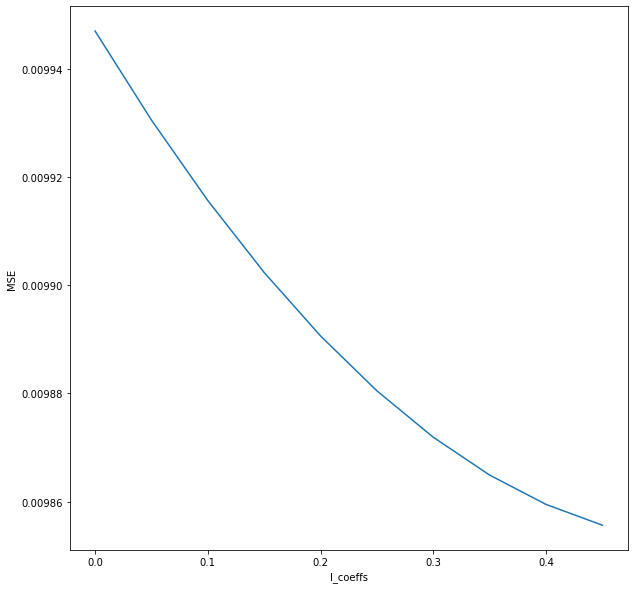

In [132]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [134]:
CANCER_DATA_PATH = 'cancer.csv'
SPAM_DATA_PATH = 'spam.csv'

In [135]:
def read_cancer_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    y = [1 if i == 'M' else 0 for i in df["label"]]
    return df.drop("label", axis=1).to_numpy(), np.array(y)

def read_spam_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    y = df["label"]
    return df.drop("label", axis=1).to_numpy(), np.array(y.values)

In [136]:
X_cancer, y_cancer = read_cancer_dataset(CANCER_DATA_PATH)
X_cancer = StandardScaler().fit_transform(X_cancer)

X_spam, y_spam = read_spam_dataset(SPAM_DATA_PATH)
X_spam = StandardScaler().fit_transform(X_spam)

NormalL
 0.05986875983441021
GradientLR
 0.09355999747148731


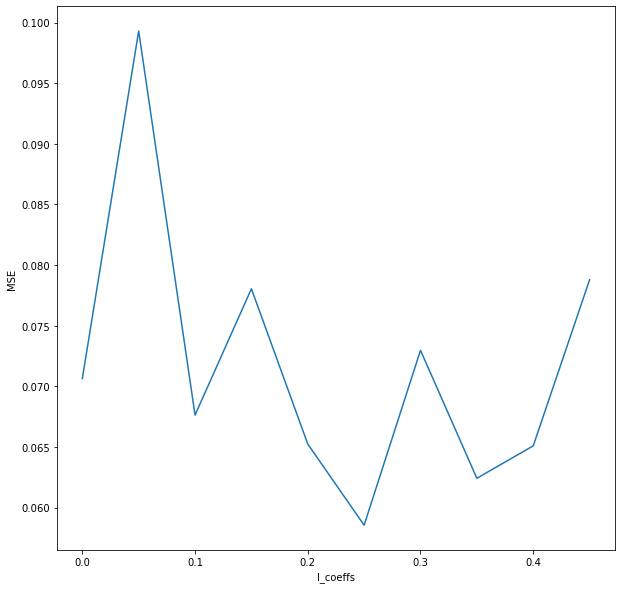

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, train_size=0.8, shuffle=False)
regr = NormalLR()
regr.fit(X_train, y_train)
print('NormalL\n', mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print('GradientLR\n', mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, iterations=10000)

NormalLR
 0.1899640438920729
GradientLR
 0.19305087369913762


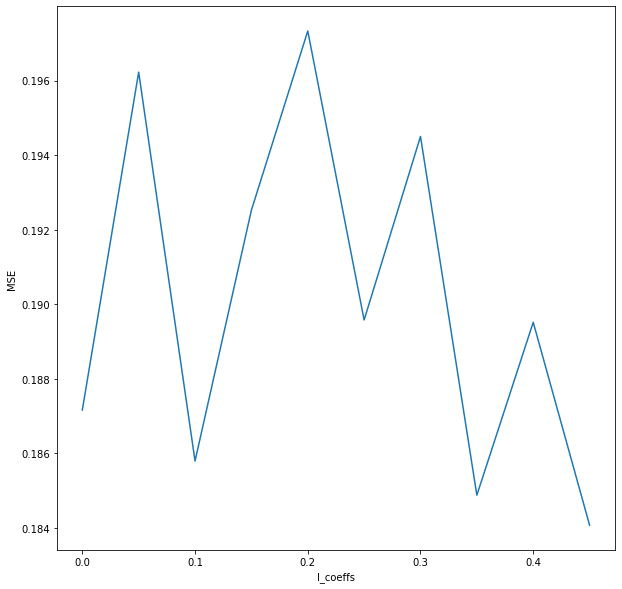

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_spam, y_spam, train_size=0.8, shuffle=False)
regr = NormalLR()
regr.fit(X_train, y_train)
print('NormalLR\n', mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print('GradientLR\n', mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, iterations=10000)